In [1]:
from pandas import Series, DataFrame
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [18]:
green_buildings = pd.read_csv('greenbuildings.csv')
green_buildings.head()

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78


In [33]:
cluster_grouping = green_buildings.groupby(['cluster', 'age'])[['Rent']].mean()
# mean_group_speed = cars.groupby(['cyl', 'manufacturer'])[['speed']].mean()

cluster_grouping

Rent
cluster age        
1       5     40.69
        16    38.56
        20    43.16
        27    28.57
        36    33.31
...             ...
1230    95    44.50
        96    51.56
        97    44.00
        101   65.00
        107  111.11

[6177 rows x 1 columns]

KeyError: False

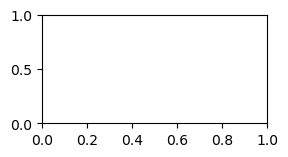

In [32]:
plt.subplot(3,2,1)
sns.boxplot(y='Rent', x = 'green_rating', data=cluster_grouping[['cluster']=='1'])
# plt.subplot(3,2,2)
# sns.boxplot(y='review', x = 'Rent', data=employee)
# plt.subplot(3,2,3)
# sns.boxplot(y='projects', x = 'Rent', data=employee)
# plt.subplot(3,2,4)
# sns.boxplot(y='tenure', x = 'Rent', data=employee)
# plt.subplot(3,2,5)
# sns.boxplot(y='satisfaction', x = 'Rent', data=employee)

<Axes: title={'center': 'Rent for Green and Non Green Buildings'}, xlabel='green_rating', ylabel='Rent'>

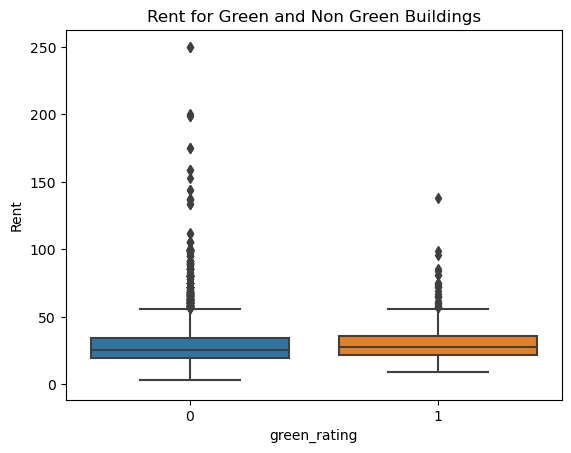

In [25]:
# check numerical variable vs. y
plt.plot(1,1,1)
plt.title('Rent for Green and Non Green Buildings')
sns.boxplot(y='Rent', x = 'green_rating', data=green_buildings)


<Axes: title={'center': 'Rent for Class A and Non Class A Buildings'}, xlabel='class_a', ylabel='Rent'>

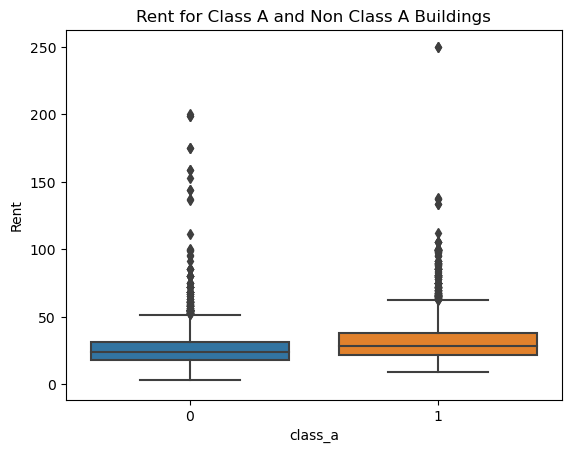

In [26]:
plt.plot(1,1,1)
plt.title('Rent for Class A and Non Class A Buildings')
sns.boxplot(y='Rent', x = 'class_a', data=green_buildings)

In [ ]:
# do above box plots but for each cluster

In [36]:
mask = green_buildings['green_rating'] == 1
mask.head(10)

0     True
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9    False
Name: green_rating, dtype: bool

In [38]:
green_rated = green_buildings[mask]
green_rated.head()

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.0137,0.0290,36.780
6,236739,6,210038,4.01,12.50,94.33,11,38,0,0,...,1,0,1,2746,1670,4416,25.55,0.0101,0.0289,17.500
16,431225,8,409889,67.78,30.50,97.06,20,6,0,1,...,1,0,0,5240,956,6196,10.46,0.0120,0.0235,25.500
29,204299,11,525422,1.74,25.00,71.10,16,23,0,1,...,1,0,1,1113,6001,7114,41.32,0.0108,0.0233,22.000
34,437486,13,378538,3.27,26.61,95.54,17,22,0,1,...,1,0,1,2269,2382,4651,40.70,0.0138,0.0229,25.055


NameError: name 'x' is not defined

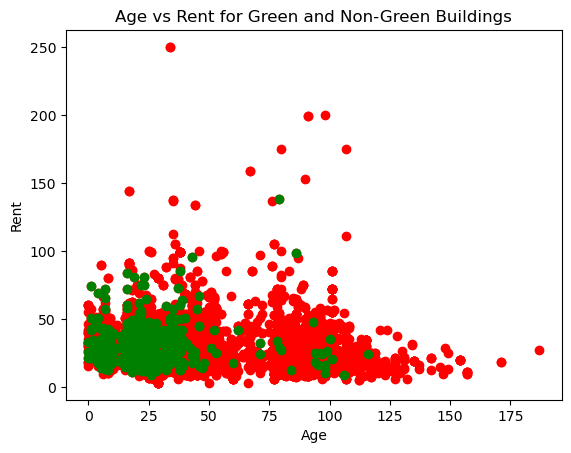

In [50]:
import numpy as np
from scipy import stats


# Create a scatter plot
plt.scatter(green_buildings['age'], green_buildings['Rent'], label='All buildings', color='red')
plt.scatter(green_rated['age'], green_rated['Rent'], label='Green rated buildings', color='green')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Rent')
plt.title('Age vs Rent for Green and Non-Green Buildings')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
regression_line = slope * x + intercept

# Plot the regression line
plt.plot(x, regression_line, color='red', label='Regression Line')

# Add legend
plt.legend()

# Show the plot
plt.show()

In the above plot, blah balh

## Leasing Rates for Buildings in their First 10 Years

### Display the leasing rate of all buildings of age < 10 years

     leasing_rate
age              
0       39.929259
1       66.351944
2       72.274074
3       93.023889
4       86.747353
5       94.270000
6       87.449625
7       89.703846
8       89.577879
9       86.723208


Text(0, 0.5, 'Leasing Rate')

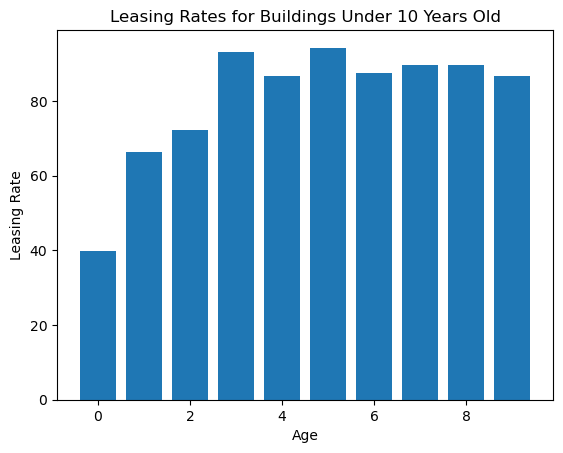

In [76]:
mask = green_buildings['age'] < 10
age_under_10 = green_buildings[mask]

grouped_data = age_under_10.groupby('age')['leasing_rate'].mean().reset_index()
grouped_data = grouped_data.set_index('age')

# grouped_data.head(10)
print(grouped_data)

plt.bar(grouped_data.index, grouped_data['leasing_rate'])
plt.title('Leasing Rates for All Buildings Under 10 Years Old')
plt.xlabel('Age')
plt.ylabel('Leasing Rate')

In [77]:
avg_lease_rate = grouped_data['leasing_rate'].mean()


80.6051077096738

### Compare leasing rates of green rated buildings to all buildings

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Leasing rate for all buildings their first 10 years
     leasing_rate
age              
0       39.929259
1       66.351944
2       72.274074
3       93.023889
4       86.747353
5       94.270000
6       87.449625
7       89.703846
8       89.577879
9       86.723208

Leasing rate for green buildings their first 10 years
     leasing_rate
age              
0       37.253333
1       77.881250
2       90.635000
3       97.326667
4       79.741667
5       94.274545
6       92.447273
7       93.085000
8       93.316875
9       95.233000


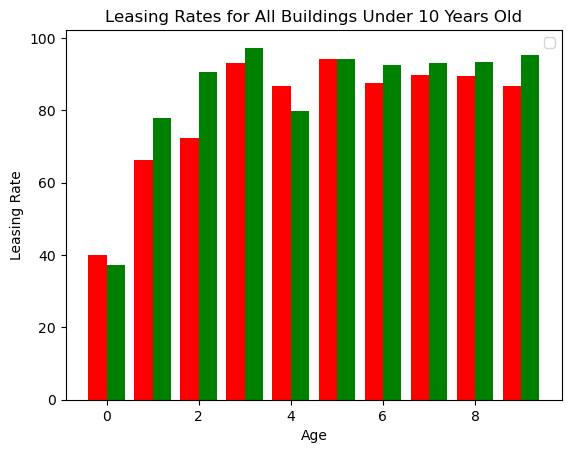

In [97]:
mask = green_buildings['age'] < 10
age_under_10 = green_buildings[mask]

mask2 = age_under_10['green_rating'] == 1
green_under_10 = age_under_10[mask2]
green_under_10.head(10)

grouped_data_all = age_under_10.groupby('age')['leasing_rate'].mean().reset_index()
grouped_data_all = grouped_data_all.set_index('age')

grouped_data_green = green_under_10.groupby('age')['leasing_rate'].mean().reset_index()
grouped_data_green = grouped_data_green.set_index('age')

# grouped_data.head(10)
print('Leasing rate for all buildings their first 10 years')
print(grouped_data_all)
print()
print('Leasing rate for green buildings their first 10 years')
print(grouped_data_green)

width = 0.4

plt.bar(grouped_data_all.index - width/2, grouped_data_all['leasing_rate'], width, color='red')
plt.bar(grouped_data_green.index + width/2, grouped_data_green['leasing_rate'], width, color='green')
plt.title('Leasing Rates for All Buildings Under 10 Years Old')
plt.xlabel('Age')
plt.ylabel('Leasing Rate')
plt.legend()
plt.show()

In [91]:
avg_lease_rate_all = grouped_data_all['leasing_rate'].mean()
avg_lease_rate_green = grouped_data_green['leasing_rate'].mean()

print('Average leasing rate for all buildings in their first 10 years:', avg_lease_rate_all)
print('Average leasing rate for green buildings in their first 10 years:', avg_lease_rate_green)

Average leasing rate for all buildings in their first 10 years: 80.6051077096738
Average leasing rate for green buildings in their first 10 years: 85.11946098484847


In [96]:
green_premium = 100000000 * 0.05
yearly_revenue = 650000 * (avg_lease_rate_green / 100)

years_to_recoup = green_premium / yearly_revenue

print('At the average lease rate for the first 10 years of a green building, \
it would take {} years to recoup the green premium'.format(years_to_recoup.round(2)))

At the average lease rate for the first 10 years of a green building, it would take 9.04 years to recoup the green premium


The above findings show that the original estimate (that it would take 7.7 years to recoup the green premium via revenue from the difference in rent for green vs non-green buildings) may have been overly optimistic based on false assumption that the building would have a 100% lease rate immediately and consistently, or 90% at worst. These findings show that, on average, a green building has a leasing rate of 85.12% for its first 10 years, which would translate to 9.04 years in order to recoup the green premium.